<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed May 15 08:36:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.04              Driver Version: 536.23       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 ...    On  | 00000000:01:00.0  On |                  N/A |
|  0%   43C    P0              37W / 140W |    653MiB /  6144MiB |      2%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch


# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

2.3.0
cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
# import torch
import torch
import torch.nn as nn

# import torchvision
import torchvision
from torchvision import datasets

import matplotlib.pyplot as plt

print(f"PyTorch Version: {torch.__version__}")
print(f"Torchvision Version: {torchvision.__version__}")



PyTorch Version: 2.3.0
Torchvision Version: 0.18.0


### 5.1. Getting a dataset


`torchvision.transforms.ToTensor` is a transform function in PyTorch's `torchvision` library. It converts a PIL Image or a numpy.ndarray with shape (H, W, C) in the range [0, 255] to a torch.FloatTensor of shape (C, H, W) in the range [0.0, 1.0]. 

This is often used as a part of preprocessing steps in computer vision tasks. It makes the image suitable for use with PyTorch models, as they expect the input in this format.

In [4]:
# setup training data

train_data = datasets.MNIST(root='data', train=True, download=True, transform=torchvision.transforms.ToTensor(), target_transform=None)

test_data = datasets.MNIST(root='data', train=False, download=True, transform=torchvision.transforms.ToTensor(), target_transform=None)

The discrepancy between the range of values in `image` and `train_data.data` is due to the transformation applied when loading the dataset.

When you load a dataset in PyTorch using a DataLoader, you can specify transformations to be applied to the data. One common transformation is `torchvision.transforms.ToTensor()`, which converts PIL Images or numpy arrays with a range of [0, 255] (standard for image data) to a PyTorch tensor with a range of [0, 1].

So, when you access an image from `train_data` directly, like `image, label = train_data[0]`, you're getting the transformed image data, which has been normalized to [0, 1]. 

On the other hand, `train_data.data` gives you the original, untransformed image data, which is why its values are in the range [0, 255].

In [5]:
image, label = train_data[0]
image.shape
train_data.targets[0]
train_data.data[0]
train_data.classes
train_data.data.shape
train_data[0][0]


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

## 6. Visualize at least 5 different samples of the MNIST training dataset.

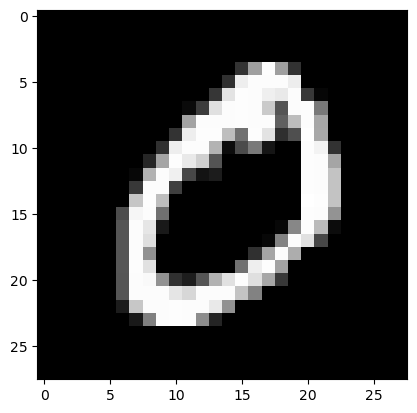

In [6]:

plt.imshow(train_data.data[1,:,:].squeeze(), cmap='gray')


Text(0.5, 1.0, 'Label: 5')

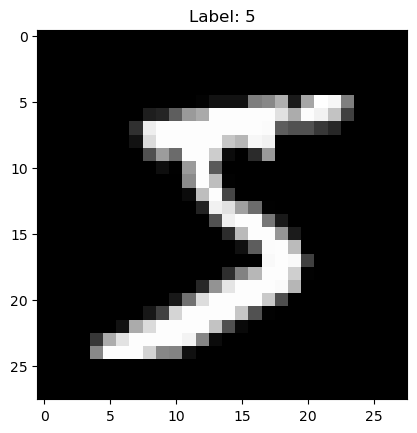

In [7]:
plt.imshow(train_data[0][0].squeeze(), cmap="gray")
plt.title(f"Label: {train_data[0][1]}")

Text(0.5, 1.0, 'Label: 0')

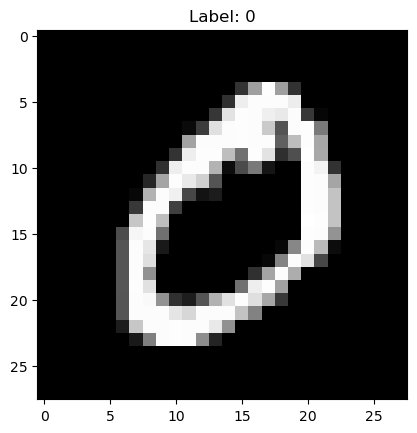

In [8]:
plt.imshow(train_data[1][0].squeeze(), cmap="gray")
plt.title(f"Label: {train_data[1][1]}")

Text(0.5, 1.0, 'Label: 4')

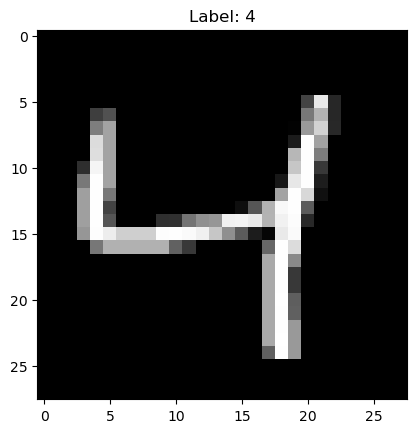

In [9]:
plt.imshow(train_data[2][0].squeeze(), cmap="gray")
plt.title(f"Label: {train_data[2][1]}")

Text(0.5, 1.0, 'Label: 1')

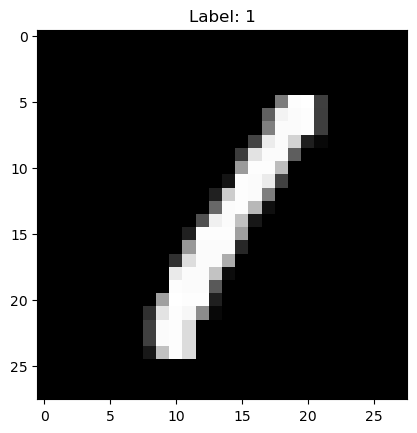

In [10]:
plt.imshow(train_data[3][0].squeeze(), cmap="gray")
plt.title(f"Label: {train_data[3][1]}")

Text(0.5, 1.0, 'Label: 9')

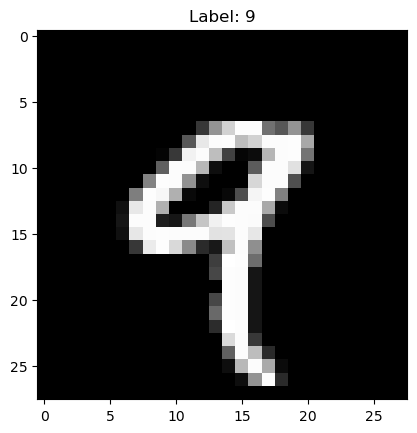

In [11]:
plt.imshow(train_data[4][0].squeeze(), cmap="gray")
plt.title(f"Label: {train_data[4][1]}")

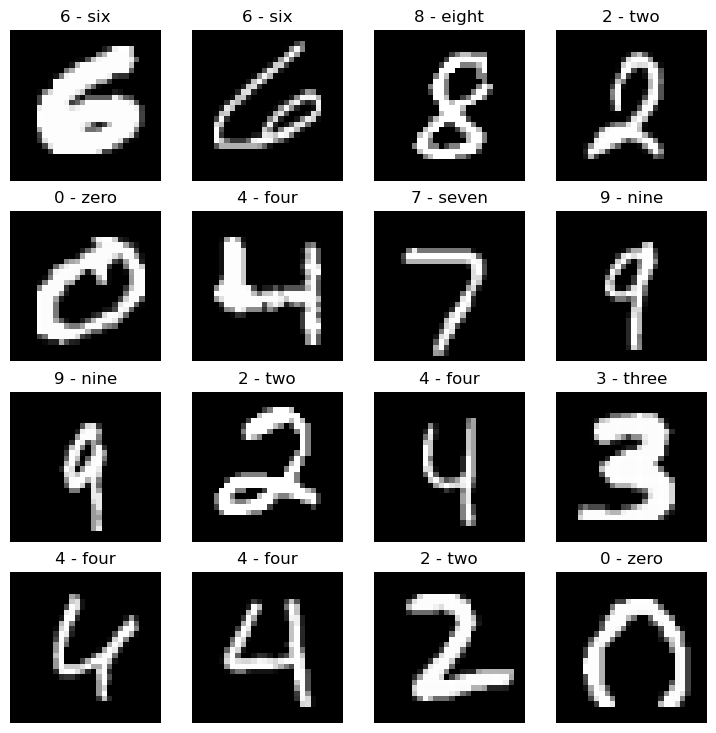

In [12]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
class_names = train_data.classes
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [15]:
from torch.utils.data import DataLoader

# Create data loaders
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"Dataloaders: {train_dataloader}, {test_dataloader}")




Dataloaders: <torch.utils.data.dataloader.DataLoader object at 0x7f892d4d1e10>, <torch.utils.data.dataloader.DataLoader object at 0x7f89313487d0>


In [60]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [63]:
train_dataloader.dataset[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [19]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

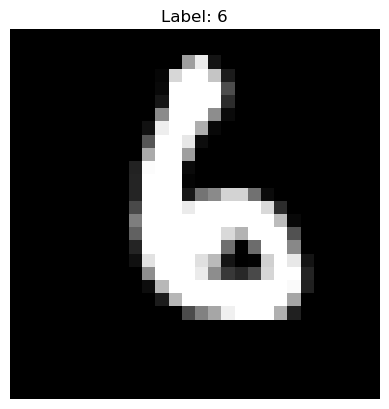

In [51]:
# Read out one data from train_dataloader

# torch.random.manual_seed(43)

random_idx = torch.randint(0, len(train_dataloader), size=[1]).item()
train_features_batch, train_labels_batch = train_dataloader.dataset[random_idx]
plt.imshow(train_features_batch.squeeze(), cmap="gray")
plt.title(f"Label: {train_labels_batch}")
plt.axis(False)


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

### 8.1 Create a linear model

In [55]:
from torch import nn
from torch.nn import functional as F

class Model0(nn.Module):
    def __init__(self, input_features=28 * 28, hidden_size=512, num_classes=10):
        super(Model0, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_features, hidden_size),
            nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
    

In [56]:
model_0 = Model0()
model_0.to(device)



Model0(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [57]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    # Note: you need the "raw" GitHub URL for this to work
    request = requests.get(
        "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    )
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

In [59]:
# Import accuracy metric
from helper_functions import (
    accuracy_fn,
)  # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = (
    nn.CrossEntropyLoss()
)  # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [58]:
from timeit import default_timer as timer


def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [69]:
torch.manual_seed(42)

start_CPU = timer()

epoches = 3
model_0.to('cpu')

for epoch in range(epoches):
    print(f"Epoch {epoch + 1}/{epoches}")
    for batch_idx, (data, targets) in enumerate(train_dataloader):
        data = data.to(device='cpu')
        targets = targets.to(device='cpu')

        # forward pass
        scores = model_0(data)
        loss = loss_fn(scores, targets)

        # backward pass
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

        if batch_idx % 200 == 0:
            print(f"Batch {batch_idx}/{len(train_dataloader)}")
            print(f"Loss: {loss}")

    model_0.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for data, targets in test_dataloader:
            data = data.to(device='cpu')
            targets = targets.to(device='cpu')

            scores = model_0(data)
            _, predictions = scores.max(1)
            correct += (predictions == targets).sum()
            total += targets.size(0)

        print(f"Accuracy: {correct/total}")

end_CPU = timer()        
total_train_time_model_0_CPU = print_train_time(start_CPU, end_CPU, device='CPU')

Epoch 1/3
Batch 0/1875
Loss: 0.10956612974405289
Batch 200/1875
Loss: 0.5299422740936279
Batch 400/1875
Loss: 0.10136862844228745
Batch 600/1875
Loss: 0.10904324054718018
Batch 800/1875
Loss: 0.35886865854263306
Batch 1000/1875
Loss: 0.20651327073574066
Batch 1200/1875
Loss: 0.23481445014476776
Batch 1400/1875
Loss: 0.30133378505706787
Batch 1600/1875
Loss: 0.07764264196157455
Batch 1800/1875
Loss: 0.23779764771461487
Accuracy: 0.9218000173568726
Epoch 2/3
Batch 0/1875
Loss: 0.07543715834617615
Batch 200/1875
Loss: 0.564842700958252
Batch 400/1875
Loss: 0.4047698974609375
Batch 600/1875
Loss: 0.35059717297554016
Batch 800/1875
Loss: 0.5901216864585876
Batch 1000/1875
Loss: 0.2891019582748413
Batch 1200/1875
Loss: 0.5347045063972473
Batch 1400/1875
Loss: 0.1982285976409912
Batch 1600/1875
Loss: 0.3347111940383911
Batch 1800/1875
Loss: 0.28572705388069153
Accuracy: 0.9228000044822693
Epoch 3/3
Batch 0/1875
Loss: 0.20193596184253693
Batch 200/1875
Loss: 0.18936030566692352
Batch 400/1875


In [70]:
torch.manual_seed(42)

start_CPU = timer()

epoches = 3
model_0.to(device)

for epoch in range(epoches):
    print(f"Epoch {epoch + 1}/{epoches}")
    for batch_idx, (data, targets) in enumerate(train_dataloader):
        data = data.to(device)
        targets = targets.to(device)

        # forward pass
        scores = model_0(data)
        loss = loss_fn(scores, targets)

        # backward pass
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

        if batch_idx % 200 == 0:
            print(f"Batch {batch_idx}/{len(train_dataloader)}")
            print(f"Loss: {loss}")

    model_0.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for data, targets in test_dataloader:
            data = data.to(device)
            targets = targets.to(device)

            scores = model_0(data)
            _, predictions = scores.max(1)
            correct += (predictions == targets).sum()
            total += targets.size(0)

        print(f"Accuracy: {correct/total}")

end_CPU = timer()
total_train_time_model_0_CPU = print_train_time(start_CPU, end_CPU, device="CPU")

Epoch 1/3
Batch 0/1875
Loss: 0.12163414806127548
Batch 200/1875
Loss: 0.5446215271949768
Batch 400/1875
Loss: 0.10815892368555069
Batch 600/1875
Loss: 0.11479447036981583
Batch 800/1875
Loss: 0.36071521043777466
Batch 1000/1875
Loss: 0.2008623480796814
Batch 1200/1875
Loss: 0.22975827753543854
Batch 1400/1875
Loss: 0.30731135606765747
Batch 1600/1875
Loss: 0.07679767906665802
Batch 1800/1875
Loss: 0.2328752875328064
Accuracy: 0.9226999878883362
Epoch 2/3
Batch 0/1875
Loss: 0.07419271022081375
Batch 200/1875
Loss: 0.5776317119598389
Batch 400/1875
Loss: 0.3971102833747864
Batch 600/1875
Loss: 0.3502058684825897
Batch 800/1875
Loss: 0.5828648209571838
Batch 1000/1875
Loss: 0.2921937108039856
Batch 1200/1875
Loss: 0.5134322643280029
Batch 1400/1875
Loss: 0.19466520845890045
Batch 1600/1875
Loss: 0.33262962102890015
Batch 1800/1875
Loss: 0.2832469344139099
Accuracy: 0.9232999682426453
Epoch 3/3
Batch 0/1875
Loss: 0.19662530720233917
Batch 200/1875
Loss: 0.18356260657310486
Batch 400/1875
L

In [86]:
torch.manual_seed(42)

model_0.to(device)
def eval_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            X = X.to(device)
            y = y.to(device)
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(
                y_true=y, y_pred=y_pred.argmax(dim=1)
            )  # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,  # only works when model was created with a class
        "model_loss": loss.item(),
        "model_acc": acc,
    }


# Calculate model 0 results on test dataset
model_0_results = eval_model(
    model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'Model0',
 'model_loss': 0.2780837118625641,
 'model_acc': 0.2950869662852535}

### 8.2 ReLU model

In [ ]:
class Model1(nn.Module):
    def __init__(self, input_features=28 * 28, hidden_size=512, num_classes=10):
        super(Model1, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_features, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    



In [81]:
model_1 = Model1().to(device)
model_1.parameters().__next__().device


device(type='cuda', index=0)

In [82]:
optimizer_1 = torch.optim.SGD(params=model_1.parameters(), lr=0.1)
loss_fn_1 = nn.CrossEntropyLoss()



In [85]:
torch.manual_seed(42)

start_model_1 = timer()

for epoch in range(epoches):
    for batch_idx, (data, target) in enumerate(train_dataloader):
        data = data.to(device)
        target = target.to(device)

        # forward pass
        scores = model_1(data)
        loss = loss_fn_1(scores, target)

        # backward pass
        optimizer_1.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer_1.step()

        if batch_idx % 200 == 0:
            print(f"Epoch {epoch + 1}/{epoches}, Batch {batch_idx}/{len(train_dataloader)}")
            print(f"Loss: {loss}")
    
    model_1.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for data, target in test_dataloader:
            data = data.to(device)
            target = target.to(device)

            scores = model_1(data)
            _, predictions = scores.max(1)
            correct += (predictions == target).sum()
            total += target.size(0)

        print(f"Accuracy: {correct/total}")

Epoch 1/3, Batch 0/1875
Loss: 0.13196797668933868
Epoch 1/3, Batch 200/1875
Loss: 0.5432049036026001
Epoch 1/3, Batch 400/1875
Loss: 0.11426333338022232
Epoch 1/3, Batch 600/1875
Loss: 0.11902687698602676
Epoch 1/3, Batch 800/1875
Loss: 0.3545713424682617
Epoch 1/3, Batch 1000/1875
Loss: 0.22529874742031097
Epoch 1/3, Batch 1200/1875
Loss: 0.2652440071105957
Epoch 1/3, Batch 1400/1875
Loss: 0.34069448709487915
Epoch 1/3, Batch 1600/1875
Loss: 0.07948953658342361
Epoch 1/3, Batch 1800/1875
Loss: 0.24417120218276978
Accuracy: 0.9214999675750732
Epoch 2/3, Batch 0/1875
Loss: 0.07725831121206284
Epoch 2/3, Batch 200/1875
Loss: 0.534544825553894
Epoch 2/3, Batch 400/1875
Loss: 0.41975823044776917
Epoch 2/3, Batch 600/1875
Loss: 0.3597137928009033
Epoch 2/3, Batch 800/1875
Loss: 0.6112564206123352
Epoch 2/3, Batch 1000/1875
Loss: 0.3059777021408081
Epoch 2/3, Batch 1200/1875
Loss: 0.5826674103736877
Epoch 2/3, Batch 1400/1875
Loss: 0.20189568400382996
Epoch 2/3, Batch 1600/1875
Loss: 0.34578

### 8.3 CNN

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?